# Melbourne House Price Prediction

## Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the dataset

In [3]:
house = pd.read_csv('Melbourne.csv')

In [4]:
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Exploratory Data Analysis

### Checking the number of rows and columns in a dataset

In [5]:
house.shape

(34857, 21)

In [6]:
house.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
# Checking the datatypes of Columns
house.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [9]:
house.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


## Checking for null Values

In [10]:
house.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [11]:
house['Bathroom'].value_counts()  

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
12.0        1
9.0         1
Name: Bathroom, dtype: int64

In [12]:
house['Bathroom']=house['Bathroom'].fillna(house['Bathroom'].median())

In [13]:
house['Bedroom2'].value_counts()  

3.0     11881
4.0      6348
2.0      5777
5.0      1427
1.0       966
6.0       168
7.0        30
0.0        17
8.0        13
9.0         5
10.0        4
30.0        1
20.0        1
16.0        1
12.0        1
Name: Bedroom2, dtype: int64

In [14]:
house['Bedroom2']=house['Bedroom2'].fillna(house['Bedroom2'].median())

In [15]:
house['Car'].value_counts()

2.0     12214
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
18.0        1
12.0        1
Name: Car, dtype: int64

In [16]:
house['Car']= house['Car'].fillna(house['Car'].median())

### Dropping the features BuildingArea, YearBuilt and Landsize as the number of missing values in those features is more and thus to impute them the Data is not sufficient

In [17]:
house.drop(['BuildingArea'], axis=1, inplace=True)

In [18]:
house.drop(['YearBuilt'], axis=1, inplace=True)

In [19]:
house.drop(['Landsize'], axis=1, inplace=True)

In [20]:
house.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2            0
Bathroom            0
Car                 0
CouncilArea         3
Lattitude        7976
Longtitude       7976
Regionname          3
Propertycount       3
dtype: int64

In [21]:
house.dropna(how='any',inplace=True)

In [22]:
house.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [23]:
type_names = house.Type.value_counts().index

In [24]:
type_value = house.Type.value_counts().values

([<matplotlib.patches.Wedge at 0x21d57b909d0>,
 [Text(-0.7865269994126319, 0.7690092842059593, 'h'),
  Text(0.5811525833738695, -0.9339495033661498, 'u'),
  Text(1.0684618270335804, -0.2615135257918099, 't')],
 [Text(-0.42901472695234466, 0.4194596095668868, '75.36%'),
  Text(0.3169923182039288, -0.5094270018360816, '17.00%'),
  Text(0.5827973602001346, -0.1426437413409872, '7.64%')])

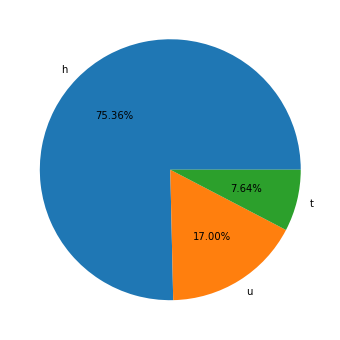

In [25]:
plt.figure(figsize=(12,6))
plt.pie(type_value,labels=type_names,autopct="%1.2f%%")

from the above figure it is observed that the houses of type 'h' is highest where as the houses of type 'u' and type 't' are 20% and 10% respectively

<Figure size 1800x432 with 0 Axes>

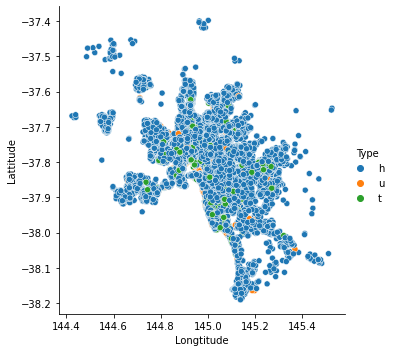

In [26]:
plt.figure(figsize=(25,6))
sns.relplot(data=house, x="Longtitude", y="Lattitude", hue="Type")

Based on Longtitude and Lattitude we can see the types of houses present around the Melbourne City.

In [27]:
house.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

<AxesSubplot:xlabel='Type', ylabel='count'>

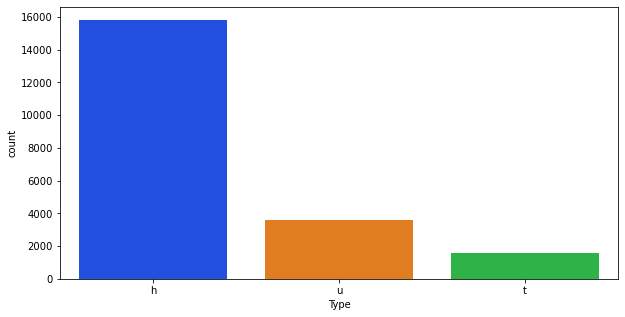

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=house,x='Type',order=house.Type.value_counts().index,palette='bright')

Type h (house,villa,cottage) are most occurred while type u which represents unit or duplex are least occurred.

<AxesSubplot:xlabel='Rooms', ylabel='count'>

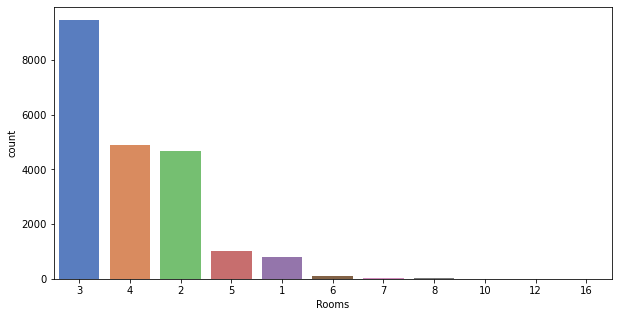

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=house,x='Rooms',order=house.Rooms.value_counts().index,palette='muted')

<AxesSubplot:xlabel='count', ylabel='CouncilArea'>

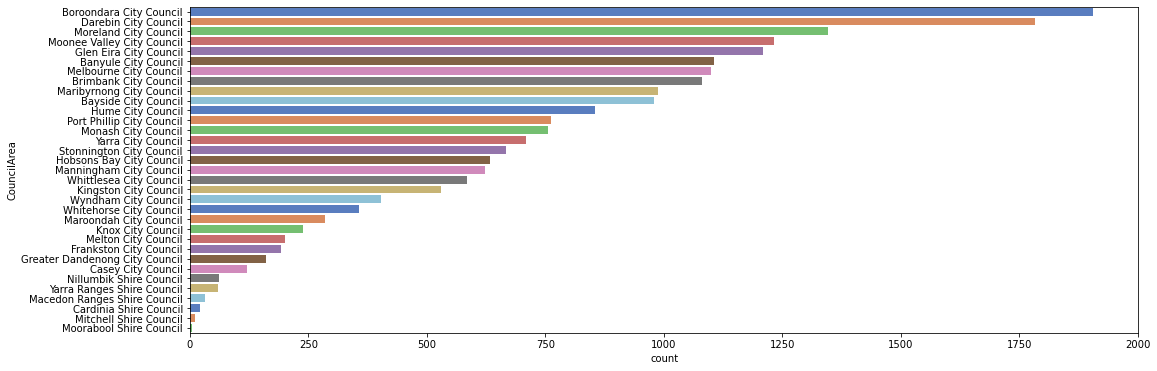

In [30]:
plt.figure(figsize=(17,6))
sns.countplot(data=house,y='CouncilArea',order=house.CouncilArea.value_counts().index,palette='muted')

<AxesSubplot:xlabel='Method', ylabel='count'>

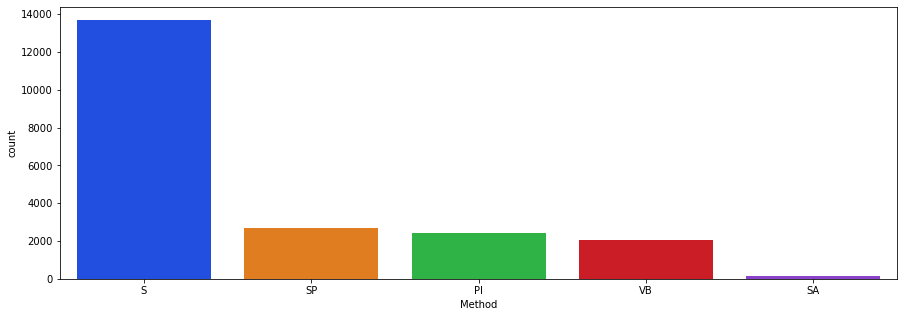

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(data=house,x='Method',order=house.Method.value_counts().index,palette='bright')

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Regionname'>

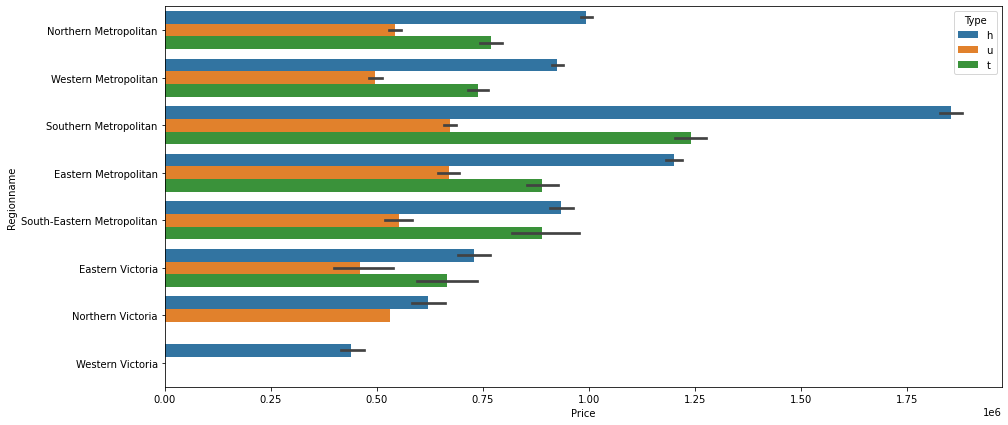

In [32]:
plt.figure(figsize=(15,7))
sns.barplot('Price','Regionname',hue='Type', data=house)

South Metropolitan region has the highest price for type h and t where as Eastern Metropolitan and South Metropolitan region have almost same price for type u data.

<AxesSubplot:xlabel='Regionname', ylabel='Car'>

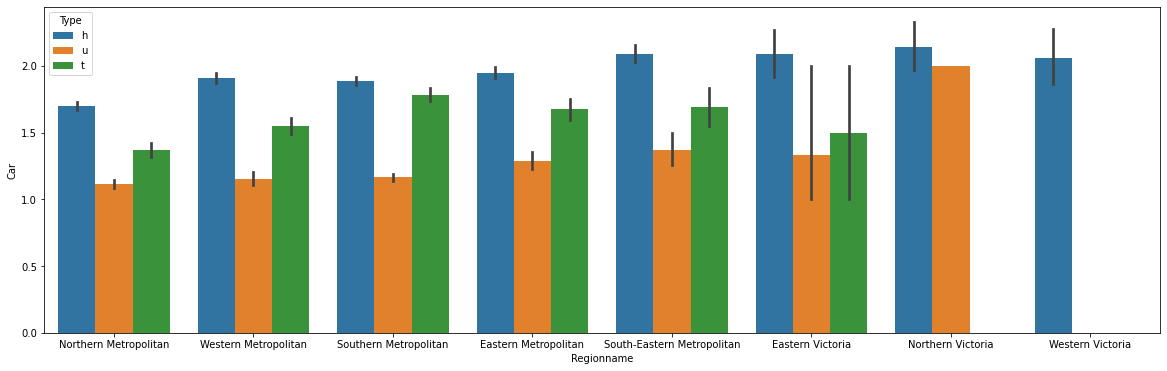

In [34]:
plt.figure(figsize=(20,6))
sns.barplot(x='Regionname',y="Car",hue="Type",data=house)

<AxesSubplot:xlabel='Suburb', ylabel='count'>

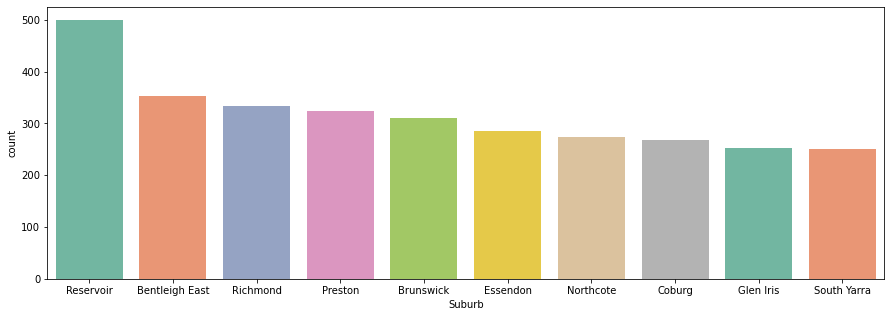

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(data=house,x='Suburb',order=house.Suburb.value_counts().head(10).index,palette='Set2')

<AxesSubplot:xlabel='SellerG', ylabel='count'>

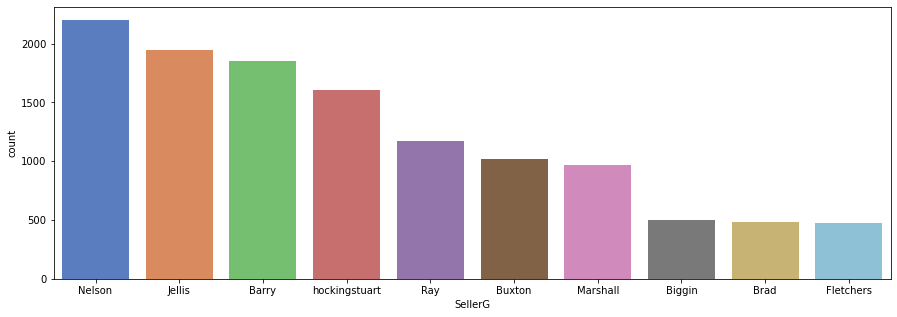

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(data=house,x='SellerG',order=house.SellerG.value_counts().head(10).index,palette='muted')

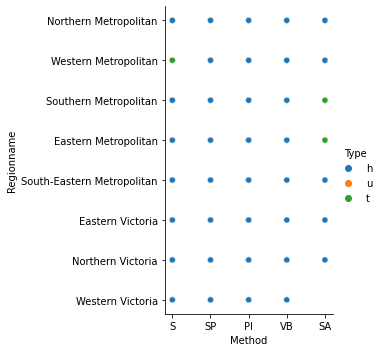

In [37]:
sns.relplot(data=house, x="Method", y="Regionname",hue='Type')

In [38]:
house.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [39]:
house['Date1']=house['Date'].apply(lambda x:x.split('/')[0])
house['Month']=house['Date'].apply(lambda x:x.split('/')[1])
house['Year']=house['Date'].apply(lambda x:x.split('/')[2])

In [40]:
house['Date1']=house['Date1'].astype(int)
house['Month']=house['Month'].astype(int)
house['Year']=house['Year'].astype(int)

In [41]:
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Date1,Month,Year
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,3,12,2016
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,4,2,2016
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,4,3,2017
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,4,3,2017
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,4,6,2016


In [42]:
house.drop('Date',axis=1,inplace=True)

In [43]:
house.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Date1,Month,Year
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,3,12,2016


<AxesSubplot:xlabel='Year', ylabel='count'>

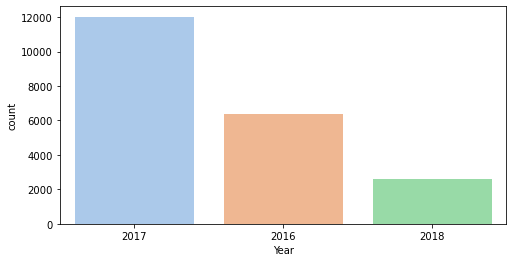

In [44]:
plt.figure(figsize=(8,4))
sns.countplot(data=house,x='Year',order=house.Year.value_counts().index,palette='pastel')

<AxesSubplot:xlabel='Month', ylabel='count'>

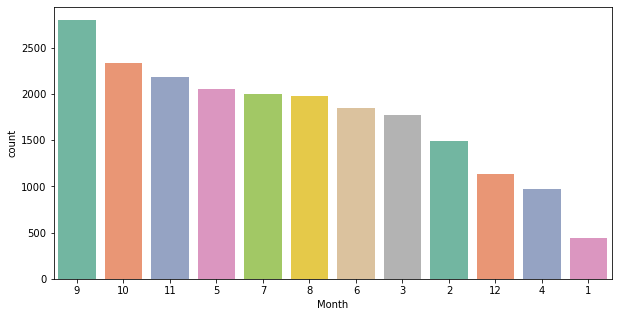

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(data=house,x='Month',order=house.Month.value_counts().index,palette='Set2')

<AxesSubplot:xlabel='Price', ylabel='Count'>

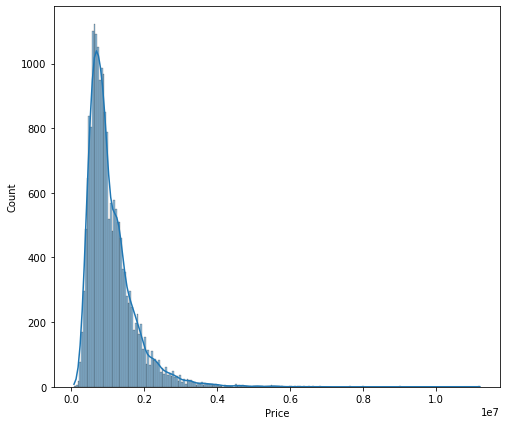

In [46]:
plt.figure(figsize=(8,7))
sns.histplot(house['Price'], kde = True)

In [47]:
house.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
Date1              int32
Month              int32
Year               int32
dtype: object

In [48]:
house['Type']=house['Type'].map({'h':1,'u':2, 't':3})
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Date1,Month,Year
1,Abbotsford,85 Turner St,2,1,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,3,12,2016
2,Abbotsford,25 Bloomburg St,2,1,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,4,2,2016
4,Abbotsford,5 Charles St,3,1,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,4,3,2017
5,Abbotsford,40 Federation La,3,1,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,4,3,2017
6,Abbotsford,55a Park St,4,1,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,4,6,2016


In [49]:
house.Method.unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [50]:
house['Method']= house['Method'].map({'S':0,'SP':1,'PI':2,'VB':3,'SA':4})
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Date1,Month,Year
1,Abbotsford,85 Turner St,2,1,1480000.0,0,Biggin,2.5,3067.0,2.0,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,3,12,2016
2,Abbotsford,25 Bloomburg St,2,1,1035000.0,0,Biggin,2.5,3067.0,2.0,1.0,0.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,4,2,2016
4,Abbotsford,5 Charles St,3,1,1465000.0,1,Biggin,2.5,3067.0,3.0,2.0,0.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,4,3,2017
5,Abbotsford,40 Federation La,3,1,850000.0,2,Biggin,2.5,3067.0,3.0,2.0,1.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,4,3,2017
6,Abbotsford,55a Park St,4,1,1600000.0,3,Nelson,2.5,3067.0,3.0,1.0,2.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,4,6,2016


<AxesSubplot:>

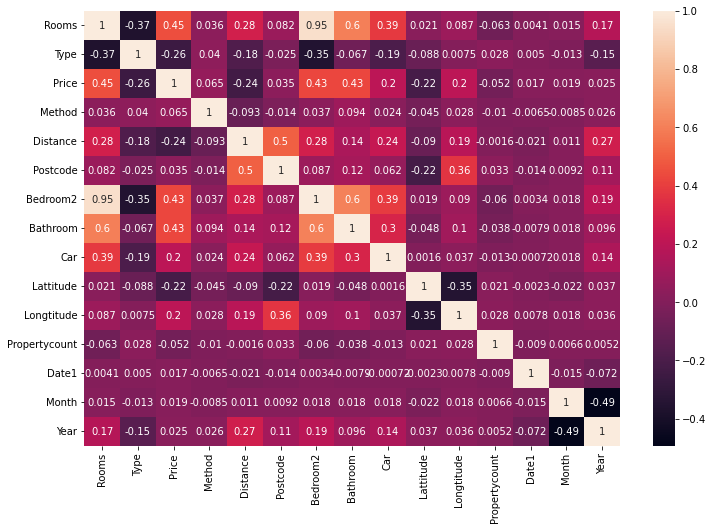

In [51]:
corr = house.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, annot=True, ax=ax)

In [52]:
house.drop('SellerG', axis=1, inplace=True)

In [53]:
house['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
house['Regionname']=le.fit_transform(house['Regionname'])
house['Suburb']=le.fit_transform(house['Suburb'])
house['CouncilArea']=le.fit_transform(house['CouncilArea'])

In [56]:
house.dtypes

Suburb             int32
Address           object
Rooms              int64
Type               int64
Price            float64
Method             int64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
CouncilArea        int32
Lattitude        float64
Longtitude       float64
Regionname         int32
Propertycount    float64
Date1              int32
Month              int32
Year               int32
dtype: object

In [57]:
house.drop('Address', axis=1, inplace=True)

In [58]:
house['Price']=house['Price'].astype(int)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [66]:
model_1=RandomForestRegressor(n_estimators=600)

In [68]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [69]:
X_train

,Suburb,Rooms,Type,Method,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Date1,Month,Year
7272,233,3,1,0,5.5,3070.0,3.0,1.0,1.0,6,-37.77590,144.99090,2,11364.0,3,9,2016
10870,337,3,1,0,7.0,3013.0,3.0,1.0,1.0,16,-37.81820,144.87270,6,6543.0,4,3,2017
31007,212,3,1,0,17.9,3082.0,3.0,2.0,1.0,29,-37.67003,145.04820,2,10529.0,3,2,2018
32639,151,3,1,3,11.2,3046.0,3.0,3.0,2.0,24,-37.71178,144.94426,2,2606.0,17,2,2018
3643,108,4,1,1,13.9,3108.0,4.0,2.0,3.0,15,-37.77350,145.10440,0,9028.0,14,5,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9748,286,3,1,0,9.7,3041.0,3.0,2.0,2.0,22,-37.73730,144.91550,6,3284.0,30,7,2016
6676,204,1,2,0,2.8,3000.0,1.0,1.0,1.0,18,-37.81570,144.97270,2,17496.0,10,9,2016
19703,298,6,1,3,12.4,3107.0,6.0,3.0,2.0,15,-37.77404,145.11703,0,5420.0,29,7,2017
27619,60,5,1,1,7.7,3124.0,5.0,2.0,3.0,2,-37.83260,145.06850,5,8920.0,18,11,2017


In [70]:
model_1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600)

In [71]:
predict_1 = model_1.predict(X_test)

In [72]:
predict_1

array([1252800.83333333, 1488958.33333333,  530532.5       , ...,
        726000.46166667,  911468.33333333, 1985934.16666667])

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [77]:
print('MAE : ',mean_absolute_error(y_test,predict_1))
mse = mean_squared_error(y_test,predict_1)
print('MSE : ',mse)
print('RMSE : ', np.sqrt(mse))

MAE :  179591.68450265657
MSE :  82293122679.11095
RMSE :  286867.7790883998


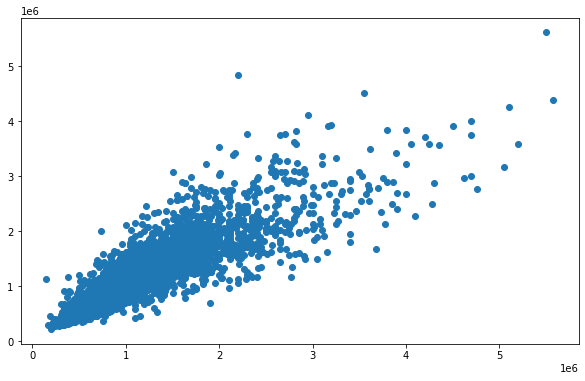

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predict_1)

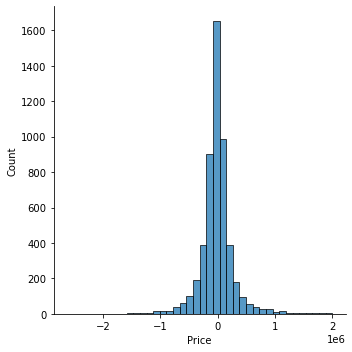

In [98]:
sns.displot(y_test - predict_1,bins = 40) 